In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("dataset/Housing.csv")

# Inspect the data
df.head()

# Encode categorical variables
label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'prefarea', 'furnishingstatus']
df[label_cols] = df[label_cols].apply(LabelEncoder().fit_transform)

# Check for missing values
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [3]:
# Separate features and target
X = df.drop("price", axis=1)
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Simple Linear Regression - R² Score: 0.27287851871974644


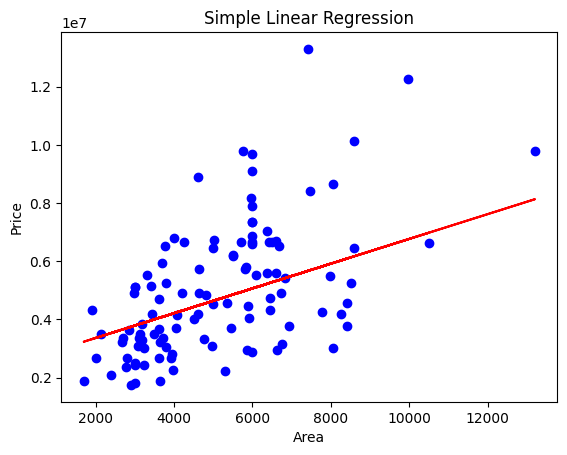

In [4]:
# Use only 'area' as feature
X_area = X[['area']]
X_train_area, X_test_area = train_test_split(X_area, test_size=0.2, random_state=42)

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_area, y_train)

# Predict
y_pred_simple = model_simple.predict(X_test_area)

# Evaluate
print("Simple Linear Regression - R² Score:", r2_score(y_test, y_pred_simple))

# Visualization
plt.scatter(X_test_area, y_test, color='blue')
plt.plot(X_test_area, y_pred_simple, color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.show()


In [5]:
# Train model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Predict
y_pred_multi = model_multi.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)
r2 = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

# Coefficients
coef_df = pd.DataFrame(model_multi.coef_, X.columns, columns=["Coefficient"])
print(coef_df)


Multiple Linear Regression:
MAE: 979679.6912959905
MSE: 1771751116594.0347
R² Score: 0.6494754192267804
                   Coefficient
area              2.358488e+02
bedrooms          7.857449e+04
bathrooms         1.097117e+06
stories           4.062232e+05
mainroad          3.668242e+05
guestroom         2.331468e+05
basement          3.931598e+05
hotwaterheating   6.878813e+05
airconditioning   7.855506e+05
parking           2.257565e+05
prefarea          6.299017e+05
furnishingstatus -2.103971e+05


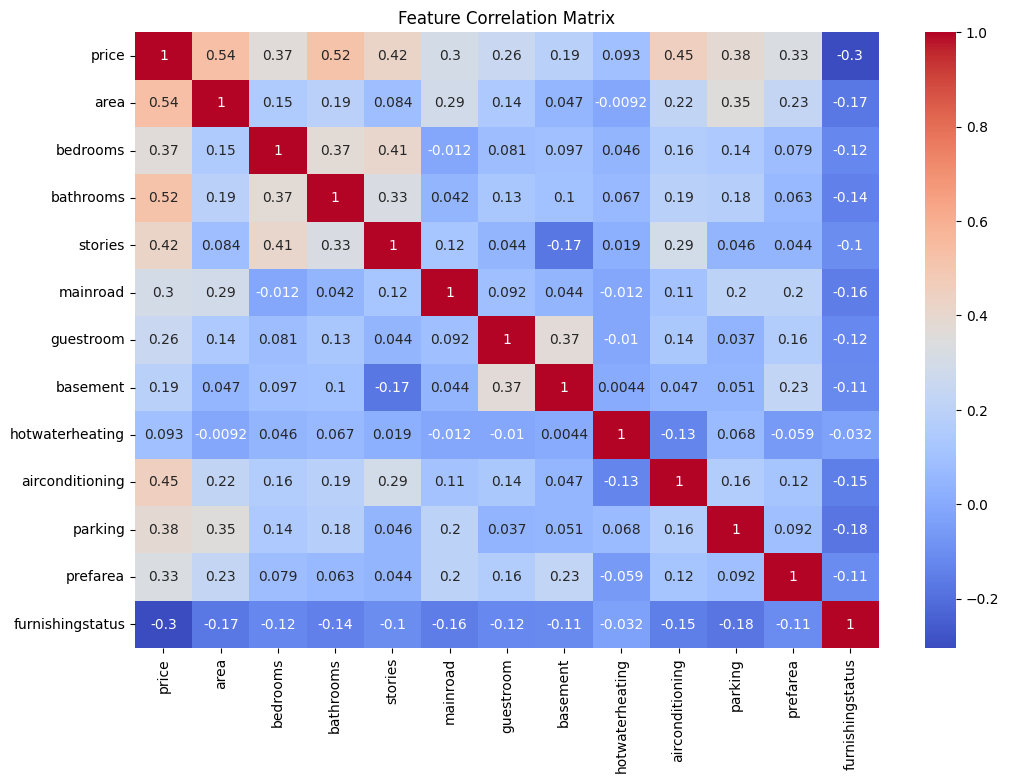

In [6]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
